In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [2]:
entry_data.info()
sales_data
item_data.info()
item_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Colum

In [3]:

temp_var=sales_data['결제금액']
temp_var

0        4,500
1        5,500
2        4,000
3        1,000
4        5,000
         ...  
7100    -3,500
7101     4,500
7102    -4,500
7103     4,000
7104    -4,000
Name: 결제금액, Length: 7105, dtype: object

In [4]:
sales_data['date'] = sales_data['결제일시'].str[:7]
sales_data['date'].value_counts()

2021-06    920
2021-04    910
2021-12    841
2021-11    679
2021-05    658
2021-10    557
2021-03    529
2022-03    415
2022-01    377
2021-07    313
2021-09    301
2021-08    293
2022-02    282
2021-02     18
2022-04     12
Name: date, dtype: int64

In [5]:
sales_data['결제금액'].str.replace(',','')

0        4500
1        5500
2        4000
3        1000
4        5000
        ...  
7100    -3500
7101     4500
7102    -4500
7103     4000
7104    -4000
Name: 결제금액, Length: 7105, dtype: object

In [6]:
temp_var=sales_data['결제금액'].str.replace(',','')
pay=pd.to_numeric(temp_var)
sales_data['payment'] = pay
#sales_data.insert(7,'payment',pay)
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   결제일시     7105 non-null   object
 1   판매위치     7105 non-null   object
 2   상품명      7105 non-null   object
 3   결제방식     7105 non-null   object
 4   비고       7105 non-null   object
 5   판매수량     7105 non-null   int64 
 6   결제금액     7105 non-null   object
 7   고객       6300 non-null   object
 8   date     7105 non-null   object
 9   payment  7105 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 555.2+ KB


In [7]:
temp_var=sales_data['payment'].groupby(sales_data['date']).sum()
temp_var

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

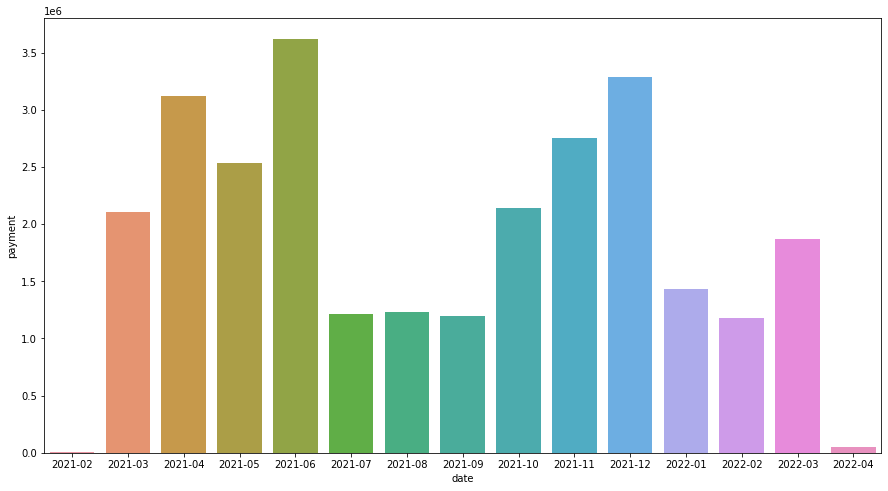

In [8]:
ax = plt.subplots(figsize=(15, 8))  # 이 코드와 밑에 코드를 바꾸면 작은 오류가 생긴다 피규어가 액자에 안걸린다고 해야할까?
ax = sns.barplot(data=temp_var.reset_index(), x='date', y='payment')

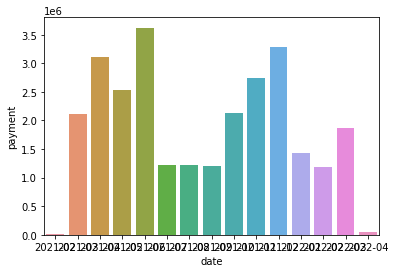

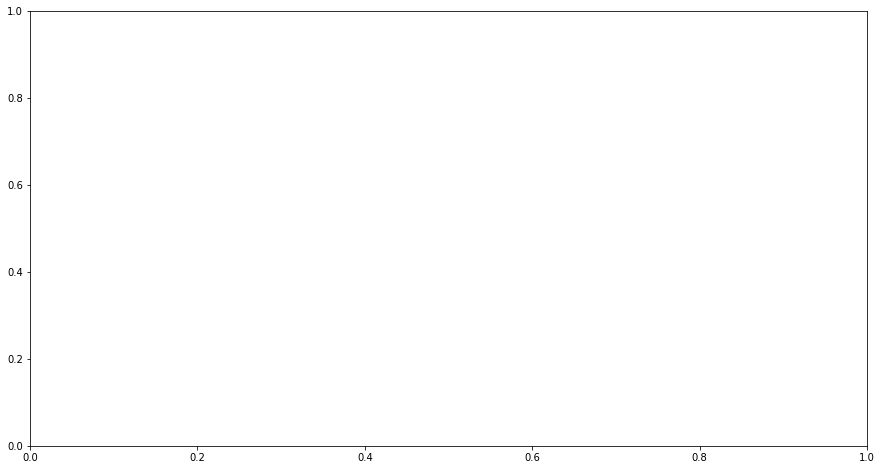

In [11]:
ax = sns.barplot(data=temp_var.reset_index(), x='date', y='payment')
ax = plt.subplots(figsize=(15, 8)) 

In [16]:
temp_var=sales_data[sales_data['판매수량']==-1]
temp_var.index
temp_var=sales_data.drop(temp_var.index)
temp_var_a=temp_var['상품명'].value_counts().sort_values(ascending=False).head(10)
temp_var_a

#sales_data.info() #판매수량 타입 확인
#temp_var=sales_data[sales_data['판매수량']==1]
#temp_var_a=temp_var['판매수량'].groupby(temp_var['상품명']).value_counts().sort_values(ascending=False).head(10)
#temp_var_a

김치볶음밥         1204
라면             749
짜장라면           455
치즈불고기볶음밥       420
계란추가           314
낙지볶음밥          312
새우볶음밥          309
아메리카노(ICE)     284
치즈감자튀김         246
감자튀김           242
Name: 상품명, dtype: int64

In [17]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
# [[YOUR CODE]]     인덱스에 상품명이 들어가 있었는데 그래서 그래프가 안그려져서 빼내는 과정을 추가하였다.
df=temp_var_a.to_frame()
df.rename(columns = {"상품명": "판매수량"},inplace=True)
df.insert(0,'상품명',df.index)
df.reset_index(drop=True, inplace=True)
df

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [18]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
# [[YOUR CODE]] 폰트깨짐 방지
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


<AxesSubplot:xlabel='상품명'>

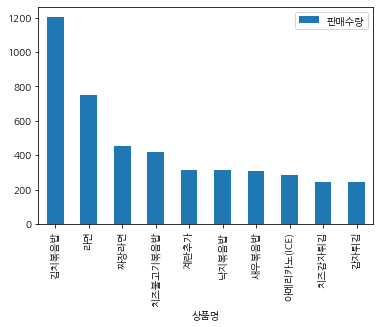

In [19]:
df.plot.bar(x='상품명',y='판매수량')

In [20]:
temp_var=sales_data['payment'].groupby(sales_data['상품명']).sum().sort_values(ascending=False).head(10)
temp_var #매출의 총합이므로 결국 결제 취소 된것도 따져야 한다고 판단 하였기 때문에, sum() 사용함.

상품명
김치볶음밥         5971900
라면            2916000
치즈불고기볶음밥      2276100
짜장라면          2032500
낙지볶음밥         1699700
새우볶음밥         1529800
치즈감자튀김        1348700
감자튀김          1083800
아메리카노(ICE)     936100
불닭볶음면          688500
Name: payment, dtype: int64

In [21]:
df2=pd.DataFrame(temp_var)
df2.rename(columns = {"payment": "매출"}, inplace=True)
df2.insert(0,'상품명',df2.index)
df2.reset_index(drop=True, inplace=True)
df2

,상품명,매출
0,김치볶음밥,5971900
1,라면,2916000
2,치즈불고기볶음밥,2276100
3,짜장라면,2032500
4,낙지볶음밥,1699700
5,새우볶음밥,1529800
6,치즈감자튀김,1348700
7,감자튀김,1083800
8,아메리카노(ICE),936100
9,불닭볶음면,688500


<AxesSubplot:xlabel='상품명'>

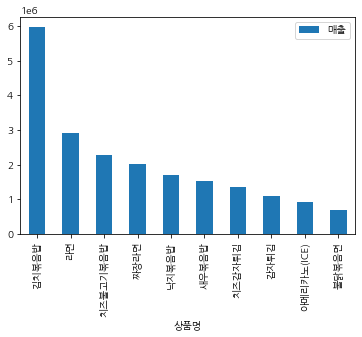

In [22]:
df2.plot.bar(x='상품명',y='매출')

In [24]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
# temp_var의 금액을 숫자형태로 변환하기
# temp_var의 금액을 요금제명을 기준으로 집계하기
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
temp_var=entry_data['금액'].groupby(entry_data['요금제명']).sum().sort_values(ascending=False).head(10)
temp_var

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

In [27]:
# 집계 결과 시각화하기
df3=pd.DataFrame(temp_var)
df3.rename(columns={'금액':'매출'},inplace=True)
df3.insert(0,'요금제명',df3.index)
df3.reset_index(drop=True,inplace=True)
df3

,요금제명,매출
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


<AxesSubplot:xlabel='요금제명'>

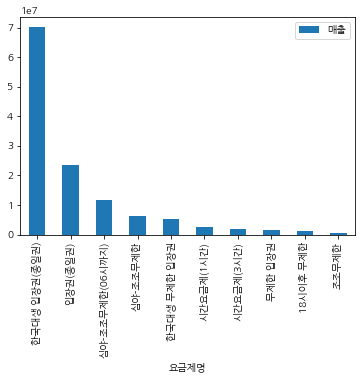

In [28]:
df3.plot.bar(x='요금제명',y='매출')

In [31]:
# 내 Key Question을 중심으로 다양한 분석을 진행해봅시다.
# [[YOUR CODE]]

#메뉴가 너무 다양함, 줄일 필요가 있어보임. 50%
#내가 전문가는 아니라 정확히는 모르겠지만, 굳이 판매량이 낮은 아이템을 가지고 있을 필요는 없어보임.
temp_var=sales_data["상품명"].value_counts(ascending=True).head(50) 
#확인해본 결과 50개 정도의 메뉴는 1~16개의 저조한 판매량을 기록중
temp_var=sales_data["상품명"].value_counts(ascending=False).head(50)
df4=pd.DataFrame(temp_var)
df4.rename(columns={'상품명':'판매량'},inplace=True)
df4.insert(0,'상품명',df4.index)
df4.reset_index(drop=True,inplace=True)
df4


,상품명,판매량
0,김치볶음밥,1211
1,라면,756
2,짜장라면,457
3,치즈불고기볶음밥,423
4,계란추가,315
5,아메리카노(ICE),314
6,낙지볶음밥,314
7,새우볶음밥,311
8,치즈감자튀김,247
9,감자튀김,242


In [30]:
'''
- 회고**(필수)**
    
    회고에는 다음과 같은 것들이 포함됩니다.
    
    - 프로젝트에서 **어려웠던 점, 해결을 위해 시도한 방법, 
    문제해결에 성공한 이유 또는 실패한 이유**
    - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**
    - 루브릭 평가 지표를 맞추기 위해 **시도한 내용**
    - 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때 이유에 관한 설명**
    - **자기 다짐, 프로젝트를 진행하면서 느낀점**
        - 회고는 여러분이 프로젝트를 카피만 하지 않고, 학습을 했다는 중요한 지표가 됩니다.
        
temp_var_a=temp_var['상품명'].value_counts().sort_values(ascending=False).head(10)
이 부분이 제일 어려웠다고 할 수 있을 것 같다. 생각을 잘못해서
temp_var_a=temp_var['판매개수'].groupby([temp_var[상품명]]).value_counts().sort_values(ascending=False).head(10)
이런식으로 해서 계속 판매개수 1이 딸려 왔고 그거를 고치느라 꽤 오랜 시간이 걸렸었다.
그래도 한 번 이해하고 나니까 그 다음부터는 큰 어려움은 없었다.


아직 시각화 하는 부분이 어렵다고 할 수 있을 것 같다.
구글링 하면서 어떻게든 사용은 하고는 있지만 응용을 한다거나 하는 부분은 조금은 미숙하다.

데이터프레임의 구조에 대해 조금은 더 자세히 알게 된 것 같고,
꼭 코드에 정해진 길만 있는 것은 아니라는 것도 다시 한 번 느꼈다.
'''

"\n- 회고**(필수)**\n    \n    회고에는 다음과 같은 것들이 포함됩니다.\n    \n    - 프로젝트에서 **어려웠던 점, 해결을 위해 시도한 방법, \n    문제해결에 성공한 이유 또는 실패한 이유**\n    - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**\n    - 루브릭 평가 지표를 맞추기 위해 **시도한 내용**\n    - 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때 이유에 관한 설명**\n    - **자기 다짐, 프로젝트를 진행하면서 느낀점**\n        - 회고는 여러분이 프로젝트를 카피만 하지 않고, 학습을 했다는 중요한 지표가 됩니다.\n        \ntemp_var_a=temp_var['상품명'].value_counts().sort_values(ascending=False).head(10)\n이 부분이 제일 어려웠다고 할 수 있을 것 같다. 생각을 잘못해서\ntemp_var_a=temp_var['판매개수'].groupby([temp_var[상품명]]).value_counts().sort_values(ascending=False).head(10)\n이런식으로 해서 계속 판매개수 1이 딸려 왔고 그거를 고치느라 꽤 오랜 시간이 걸렸었다.\n그래도 한 번 이해하고 나니까 그 다음부터는 큰 어려움은 없었다.\n\n\n아직 시각화 하는 부분이 어렵다고 할 수 있을 것 같다.\n구글링 하면서 어떻게든 사용은 하고는 있지만 응용을 한다거나 하는 부분은 조금은 미숙하다.\n\n데이터프레임의 구조에 대해 조금은 더 자세히 알게 된 것 같고,\n꼭 코드에 정해진 길만 있는 것은 아니라는 것도 다시 한 번 느꼈다.\n\n\n"